In [4]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import time
from datetime import datetime

In [5]:
# pd.set_option('display.max_rows', None)

### 0. 통일성을 위한 공통 작업

In [6]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [7]:
### 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

### 2. 월별 평균 데이터를 통해 월별 경향성을 살펴보자!

##### 전체 기간 월별 시계열 그래프

In [8]:
### '서울시 월별 평균 대기오염도 정보.csv'를 ATM_monthly_df라는 데이터프레임 형태로 불러오기

ATM_monthly_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 월별 평균 대기오염도 정보.csv', encoding='cp949')
ATM_monthly_df.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0


In [9]:
### 광진구 자료만 추출하기

gwangjin_monthly = ATM_monthly_df[ATM_monthly_df['측정소명'] == '광진구']
gwangjin_monthly

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0
...,...,...,...,...,...,...,...,...
13790,198705,광진구,0.035,0.009,1.1,0.029,NaN,NaN
13800,198704,광진구,0.039,0.007,1.8,0.068,NaN,NaN
13810,198703,광진구,0.030,0.006,2.0,0.069,NaN,NaN
13820,198702,광진구,0.013,0.003,3.1,0.112,NaN,NaN


In [10]:
### 결측치 확인

gwangjin_monthly.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      8
오존농도(ppm)         8
일산화탄소농도(ppm)      9
아황산가스(ppm)        7
미세먼지(㎍/㎥)       162
초미세먼지(㎍/㎥)      308
dtype: int64

In [11]:
### 결측치 보간
# 미세먼지, 초미세먼지 결측치가 많은 것은 측정 시작 시점의 차이 때문이라서 우선은 이산화질소, 오존에 대해서만 평균값을 이용해 보간

mean_NO2 = gwangjin_monthly['이산화질소농도(ppm)'].mean()
mean_O3 = gwangjin_monthly['오존농도(ppm)'].mean()

gwangjin_monthly['이산화질소농도(ppm)'].fillna(mean_NO2, inplace = True)
gwangjin_monthly['오존농도(ppm)'].fillna(mean_O3, inplace = True)

C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\623285642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly['이산화질소농도(ppm)'].fillna(mean_NO2, inplace = True)
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\623285642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly['오존농도(ppm)'].fillna(mean_O3, inplace = True)


In [12]:
### datetime 적용하기

gwangjin_monthly['day'] = 1
gwangjin_monthly['year'] = gwangjin_monthly['측정월']//100
gwangjin_monthly['month'] = gwangjin_monthly['측정월']%100
gwangjin_monthly.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\483164241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly['day'] = 1
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\483164241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly['year'] = gwangjin_monthly['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\483164241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,1,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,1,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,1,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,1,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,1,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,1,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,1,2022,5
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,1,2022,4


In [13]:
### datetime 적용하기

gwangjin_monthly['date'] = pd.to_datetime(gwangjin_monthly[['year', 'month', 'day']])
gwangjin_monthly.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\1400223088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly['date'] = pd.to_datetime(gwangjin_monthly[['year', 'month', 'day']])


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,1,2022,11,2022-11-01
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,1,2022,10,2022-10-01
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,1,2022,9,2022-09-01
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,1,2022,8,2022-08-01
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,1,2022,7,2022-07-01
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,1,2022,6,2022-06-01
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,1,2022,5,2022-05-01
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,1,2022,4,2022-04-01


Text(0.5, 1.0, '광진구 이산화질소, 오존 농도 월별 시계열 그래프')

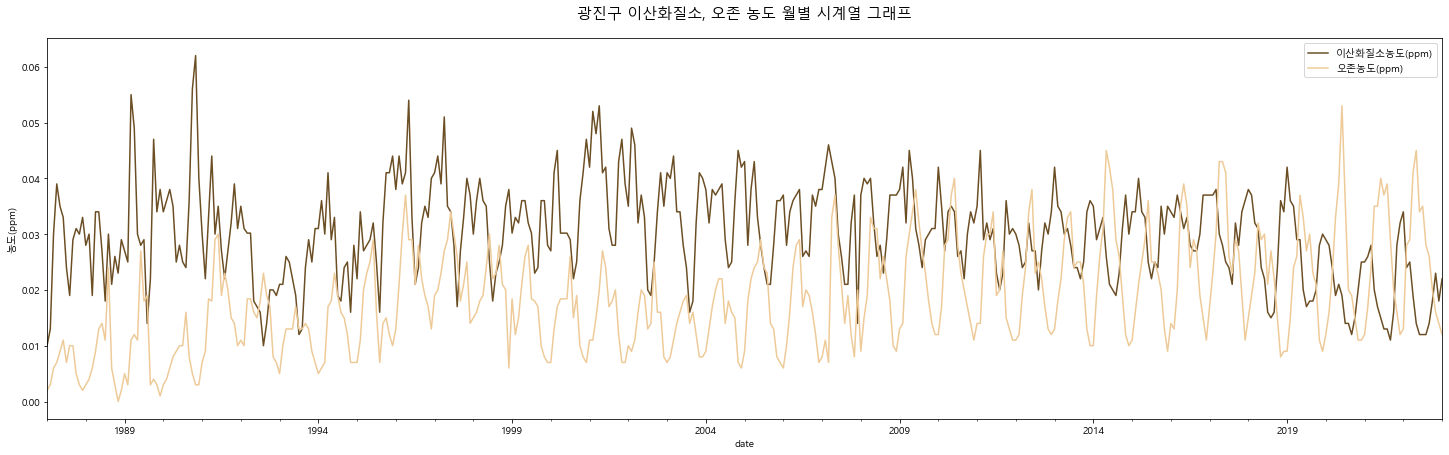

In [14]:
### 이산화질소, 오존 농도 월별 시계열 그래프

gwangjin_monthly.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], color = col, figsize=(25, 7))
plt.ylabel('농도(ppm)')
plt.xlabel('date')
plt.title('광진구 이산화질소, 오존 농도 월별 시계열 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소, 오존 농도 월별 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 미세먼지, 초미세먼지 농도 월별 시계열 그래프')

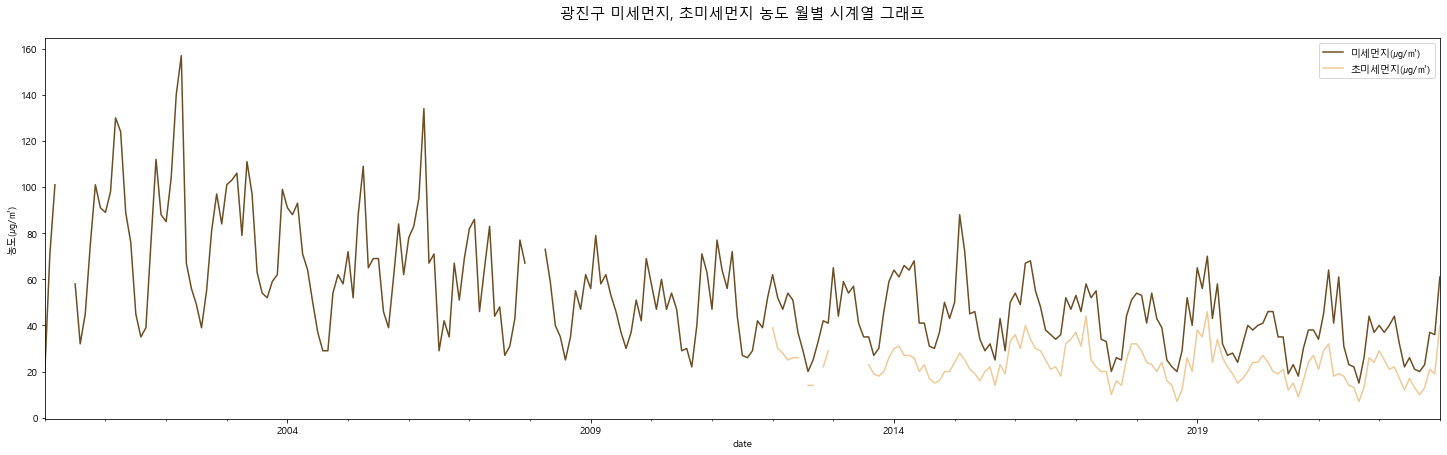

In [15]:
### 미세먼지, 초미세먼지 농도 월별 시계열 그래프

gwangjin_monthly.loc[9:10888].plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], color = col, figsize=(25, 7))
plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')
plt.title('광진구 미세먼지, 초미세먼지 농도 월별 시계열 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지, 초미세먼지 월별 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

##### 2018~2022 최근 5개년 월별 시계열 그래프

In [16]:
gwangjin_18_22 = gwangjin_monthly.loc[9:2886]
gwangjin_18_22.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,1,2022,11,2022-11-01
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,1,2022,10,2022-10-01
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,1,2022,9,2022-09-01


Text(0.5, 1.0, '광진구 이산화질소, 오존 농도 최근 5개년 월별 시계열 그래프')

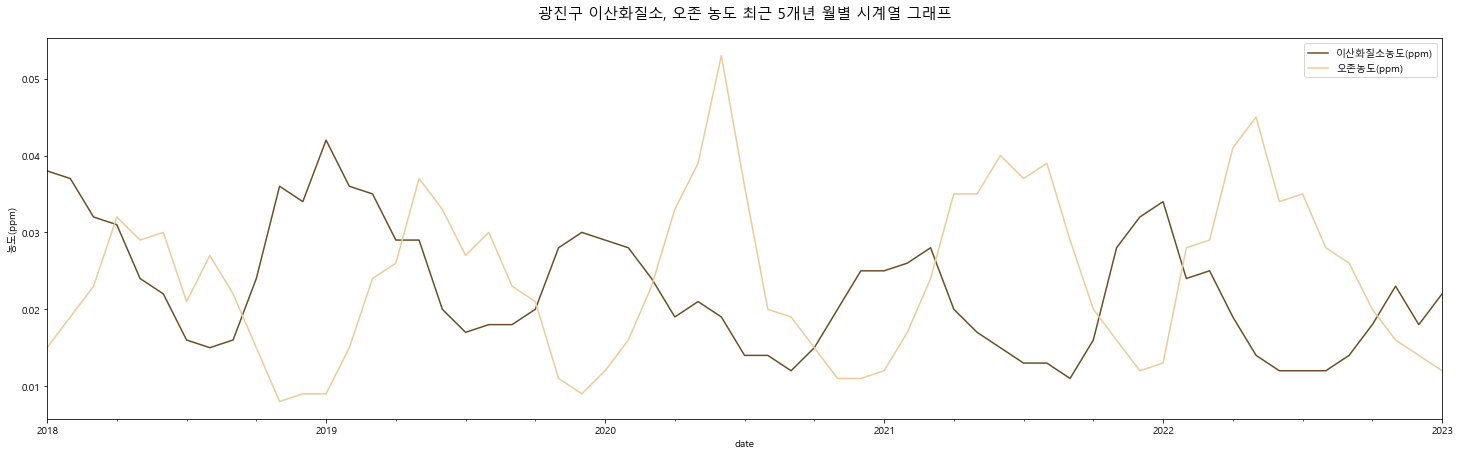

In [17]:
### 이산화질소, 오존 농도 2018~2022 월별 시계열 그래프

gwangjin_18_22.plot(x='date', y=['이산화질소농도(ppm)', '오존농도(ppm)'], color = col, figsize=(25, 7))
plt.ylabel('농도(ppm)')
plt.xlabel('date')
plt.title('광진구 이산화질소, 오존 농도 최근 5개년 월별 시계열 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소, 오존 농도 최근 5개년 월별 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 미세먼지, 초미세먼지 농도 최근 5개년 월별 시계열 그래프')

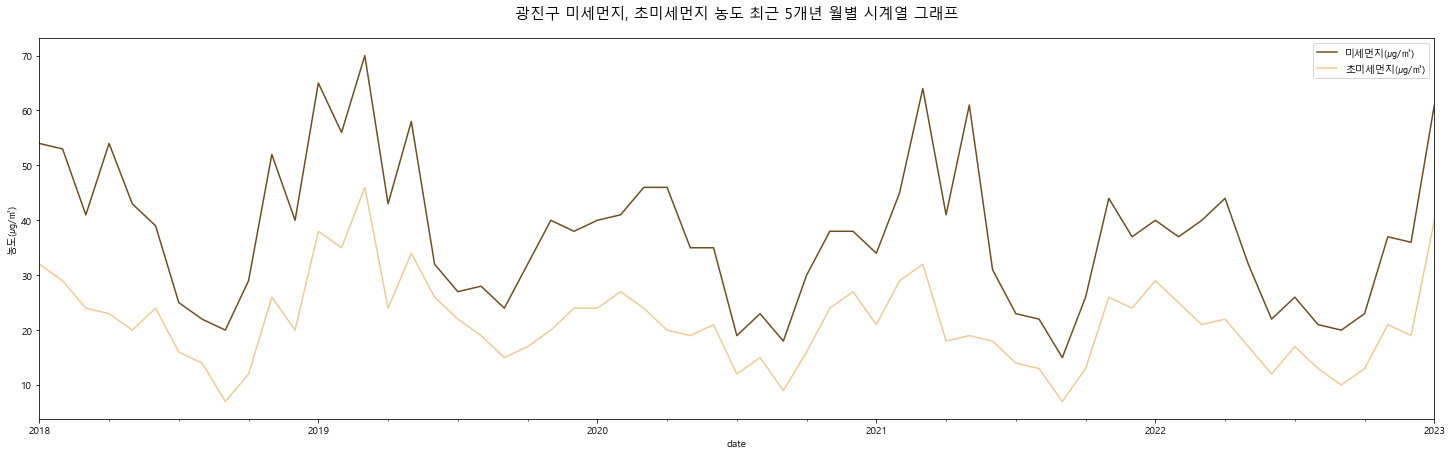

In [18]:
### 미세먼지, 초미세먼지 농도 2018~2022 월별 시계열 그래프

gwangjin_18_22.plot(x='date', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], color = col, figsize=(25, 7))
plt.ylabel('농도(㎍/㎥)')
plt.xlabel('date')
plt.title('광진구 미세먼지, 초미세먼지 농도 최근 5개년 월별 시계열 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지, 초미세먼지 농도 최근 5개년 월별 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

##### 2018~2022 최근 5개년 월별 box plot

Text(0, 0.5, '농도(ppm)')

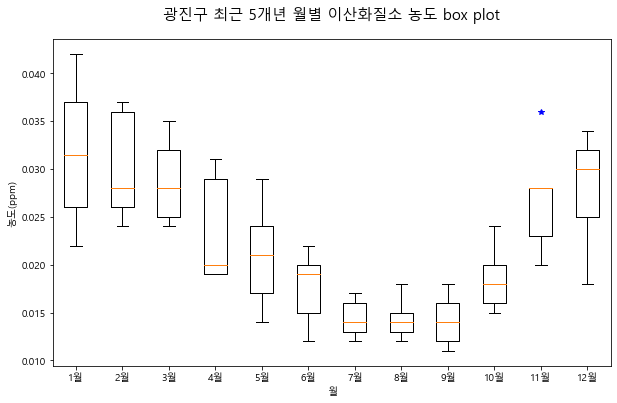

In [19]:
### 이산화질소 농도 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_18_22[gwangjin_18_22['month'] == 1]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 2]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 3]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 4]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 5]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 6]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 7]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 8]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 9]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 10]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 11]['이산화질소농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 12]['이산화질소농도(ppm)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.title('광진구 최근 5개년 월별 이산화질소 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('월')
plt.ylabel('농도(ppm)')

# plt.savefig('광진구 최근 5개년 월별 이산화질소 농도 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(ppm)')

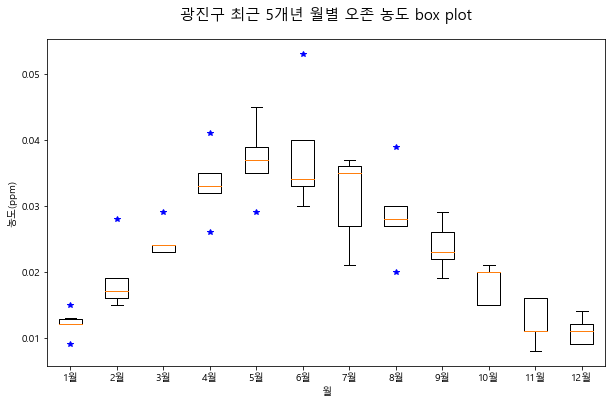

In [20]:
### 오존 농도 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_18_22[gwangjin_18_22['month'] == 1]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 2]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 3]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 4]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 5]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 6]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 7]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 8]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 9]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 10]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 11]['오존농도(ppm)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 12]['오존농도(ppm)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.title('광진구 최근 5개년 월별 오존 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('월')
plt.ylabel('농도(ppm)')

# plt.savefig('광진구 최근 5개년 월별 오존 농도 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(㎍/㎥)')

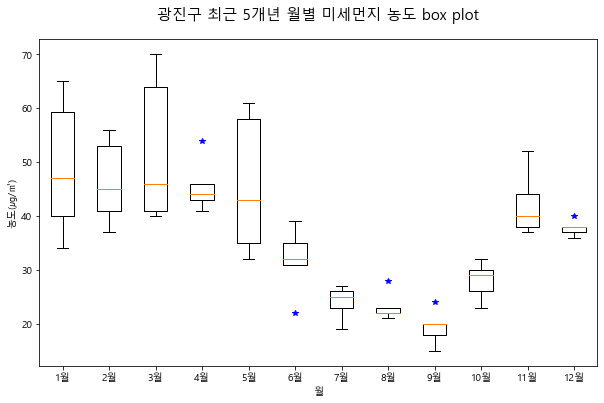

In [21]:
### 미세먼지 농도 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_18_22[gwangjin_18_22['month'] == 1]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 2]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 3]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 4]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 5]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 6]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 7]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 8]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 9]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 10]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 11]['미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 12]['미세먼지(㎍/㎥)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.title('광진구 최근 5개년 월별 미세먼지 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('월')
plt.ylabel('농도(㎍/㎥)')

# plt.savefig('광진구 최근 5개년 월별 미세먼지 농도 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(㎍/㎥)')

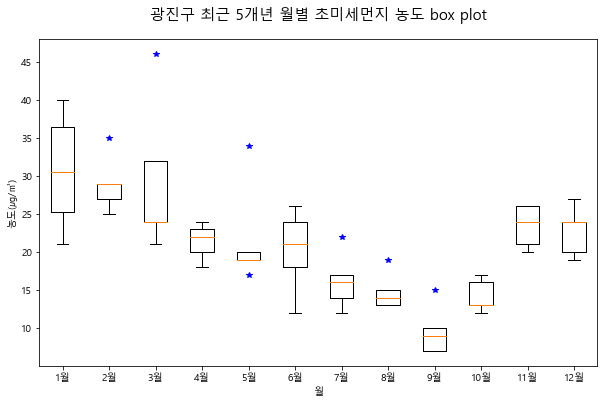

In [22]:
### 미세먼지 농도 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_18_22[gwangjin_18_22['month'] == 1]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 2]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 3]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 4]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 5]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 6]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 7]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 8]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 9]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 10]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 11]['초미세먼지(㎍/㎥)'],
            gwangjin_18_22[gwangjin_18_22['month'] == 12]['초미세먼지(㎍/㎥)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.title('광진구 최근 5개년 월별 초미세먼지 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('월')
plt.ylabel('농도(㎍/㎥)')

# plt.savefig('광진구 최근 5개년 월별 초미세먼지 농도 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

##### 월별 평균 그래프

In [23]:
### 데이터 처리

mean_NO2_by_month = gwangjin_monthly.groupby('month')['이산화질소농도(ppm)'].mean()
mean_O3_by_month = gwangjin_monthly.groupby('month')['오존농도(ppm)'].mean()
mean_PM10_by_month = gwangjin_monthly.groupby('month')['미세먼지(㎍/㎥)'].mean()
mean_PM25_by_month = gwangjin_monthly.groupby('month')['초미세먼지(㎍/㎥)'].mean()

Text(0.5, 1.0, '광진구 이산화질소, 오존 농도 월별 평균 그래프')

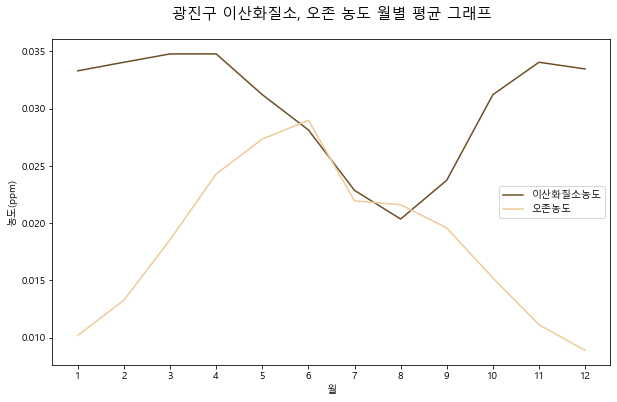

In [24]:
### 이산화질소, 오존 농도 월별 평균 그래프

plt.figure(figsize = (10, 6))
plt.plot(mean_NO2_by_month, color = '#6B4E24', label = '이산화질소농도')
plt.plot(mean_O3_by_month, color = '#EECA98', label = '오존농도')
plt.xticks(np.arange(1, 13))
plt.xlabel('월')
plt.ylabel('농도(ppm)')
plt.legend()
plt.title('광진구 이산화질소, 오존 농도 월별 평균 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소, 오존 농도 월별 평균.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 미세먼지, 초미세먼지 농도 월별 평균 그래프')

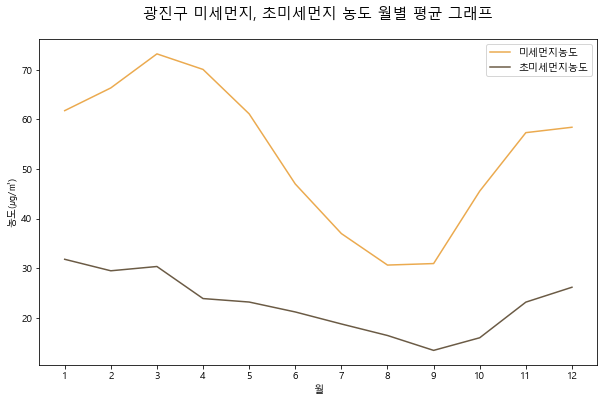

In [25]:
### 미세먼지, 초미세먼지 농도 월별 평균 그래프

plt.figure(figsize = (10, 6))
plt.plot(mean_PM10_by_month, color = '#EBAA4F', label = '미세먼지농도')
plt.plot(mean_PM25_by_month, color = '#6B5B45', label = '초미세먼지농도')
plt.xticks(np.arange(1, 13))
plt.xlabel('월')
plt.ylabel('농도(㎍/㎥)')
plt.legend()
plt.title('광진구 미세먼지, 초미세먼지 농도 월별 평균 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지, 초미세먼지 농도 월별 평균.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

##### 이산화질소 계절성 검증을 위한 Two sample t-test

H0: 이산화질소의 여름 평균과 겨울 평균은 같다  
H1: 이산화질소의 여름 평균이 겨울 평균보다 작다(단측검정)

In [26]:
### 이산화질소 농도 결측치가 있는 행 제거

nonna_NO2_monthly = gwangjin_monthly.dropna(subset=['이산화질소농도(ppm)'])
nonna_NO2_monthly.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,1,2022,11,2022-11-01
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,1,2022,10,2022-10-01
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,1,2022,9,2022-09-01


In [27]:
### 결측치 재확인

nonna_NO2_monthly.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      0
오존농도(ppm)         0
일산화탄소농도(ppm)      9
아황산가스(ppm)        7
미세먼지(㎍/㎥)       162
초미세먼지(㎍/㎥)      308
day               0
year              0
month             0
date              0
dtype: int64

In [28]:
### 여름(6~8월) 데이터 추출하기

summer_NO2_monthly = nonna_NO2_monthly[((nonna_NO2_monthly['month'] > 5) & (nonna_NO2_monthly['month'] < 9))]
summer_NO2_monthly.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,1,2022,8,2022-08-01
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,1,2022,7,2022-07-01
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,1,2022,6,2022-06-01
859,202108,광진구,0.013,0.039,0.4,0.002,22.0,13.0,1,2021,8,2021-08-01
909,202107,광진구,0.013,0.037,0.4,0.003,23.0,14.0,1,2021,7,2021-07-01
959,202106,광진구,0.015,0.040,0.5,0.003,31.0,18.0,1,2021,6,2021-06-01
1459,202008,광진구,0.014,0.020,0.4,0.003,23.0,15.0,1,2020,8,2020-08-01
1509,202007,광진구,0.014,0.036,0.4,0.003,19.0,12.0,1,2020,7,2020-07-01
1559,202006,광진구,0.019,0.053,0.5,0.003,35.0,21.0,1,2020,6,2020-06-01
2059,201908,광진구,0.018,0.030,0.7,0.004,28.0,19.0,1,2019,8,2019-08-01


In [29]:
### 겨울(12~2월) 데이터 추출하기

winter_NO2_monthly = nonna_NO2_monthly[((nonna_NO2_monthly['month'] == 12) | (nonna_NO2_monthly['month'] < 3))]
winter_NO2_monthly.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,1,2022,2,2022-02-01
609,202201,광진구,0.034,0.013,0.6,0.003,40.0,29.0,1,2022,1,2022-01-01
659,202112,광진구,0.032,0.012,0.6,0.002,37.0,24.0,1,2021,12,2021-12-01
1159,202102,광진구,0.026,0.017,0.6,0.003,45.0,29.0,1,2021,2,2021-02-01
1209,202101,광진구,0.025,0.012,0.6,0.002,34.0,21.0,1,2021,1,2021-01-01
1259,202012,광진구,0.025,0.011,0.6,0.002,38.0,27.0,1,2020,12,2020-12-01
1759,202002,광진구,0.028,0.016,0.6,0.002,41.0,27.0,1,2020,2,2020-02-01
1809,202001,광진구,0.029,0.012,0.8,0.003,40.0,24.0,1,2020,1,2020-01-01


In [30]:
### 이산화질소 데이터 추출하기

summer_NO2_monthly = summer_NO2_monthly['이산화질소농도(ppm)']
winter_NO2_monthly = winter_NO2_monthly['이산화질소농도(ppm)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\1322203307.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=summer_NO2_monthly, palette = col, shade=True, label='여름(6~8월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\1322203307.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=summer_NO2_monthly, palette = col, shade=True, label='여름(6~8월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\1322203307.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=winter_NO2_monthly, palette = col, shade=True, label='겨울(12~2월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\1322203307.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot

Text(0.5, 1.0, '이산화질소 농도의 여름 vs 겨울 확률밀도함수')

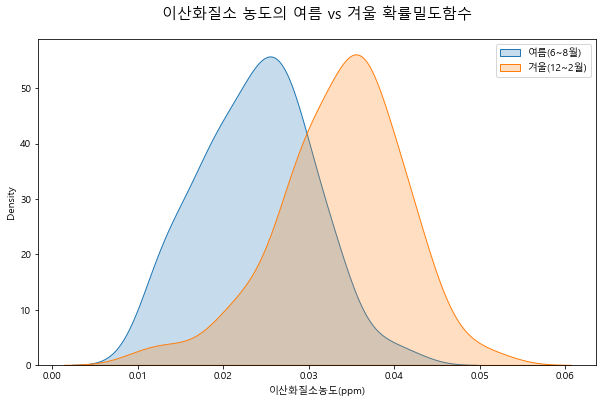

In [31]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=summer_NO2_monthly, palette = col, shade=True, label='여름(6~8월)')
sns.kdeplot(data=winter_NO2_monthly, palette = col, shade=True, label='겨울(12~2월)')
plt.legend()
plt.title('이산화질소 농도의 여름 vs 겨울 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('이산화질소 여름vs겨울 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [32]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(summer_NO2_monthly, winter_NO2_monthly, equal_var=True, alternative="less")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -10.31571858683926, p-value : 7.905451383295384e-21


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
이산화질소의 여름 평균이 겨울 평균에 비해 낮다고 말할 수 있다. 즉, 이산화질소에 계절성이 존재한다.

##### 오존 계절성 검증을 위한 Two sample t-test

H0: 오존의 여름 평균과 겨울 평균은 같다  
H1: 오존의 여름 평균이 겨울 평균보다 크다(단측검정)

In [33]:
### 오존 농도 결측치가 있는 행 제거

nonna_O3_monthly = gwangjin_monthly.dropna(subset=['오존농도(ppm)'])
nonna_O3_monthly.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,1,2022,11,2022-11-01
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,1,2022,10,2022-10-01
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,1,2022,9,2022-09-01


In [34]:
### 결측치 재확인

nonna_O3_monthly.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      0
오존농도(ppm)         0
일산화탄소농도(ppm)      9
아황산가스(ppm)        7
미세먼지(㎍/㎥)       162
초미세먼지(㎍/㎥)      308
day               0
year              0
month             0
date              0
dtype: int64

In [35]:
### 여름(6~8월) 데이터 추출하기

summer_O3_monthly = nonna_O3_monthly[((nonna_O3_monthly['month'] > 5) & (nonna_O3_monthly['month'] < 9))]
summer_O3_monthly.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,1,2022,8,2022-08-01
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,1,2022,7,2022-07-01
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,1,2022,6,2022-06-01
859,202108,광진구,0.013,0.039,0.4,0.002,22.0,13.0,1,2021,8,2021-08-01
909,202107,광진구,0.013,0.037,0.4,0.003,23.0,14.0,1,2021,7,2021-07-01
959,202106,광진구,0.015,0.040,0.5,0.003,31.0,18.0,1,2021,6,2021-06-01
1459,202008,광진구,0.014,0.020,0.4,0.003,23.0,15.0,1,2020,8,2020-08-01
1509,202007,광진구,0.014,0.036,0.4,0.003,19.0,12.0,1,2020,7,2020-07-01
1559,202006,광진구,0.019,0.053,0.5,0.003,35.0,21.0,1,2020,6,2020-06-01
2059,201908,광진구,0.018,0.030,0.7,0.004,28.0,19.0,1,2019,8,2019-08-01


In [36]:
### 겨울(12~2월) 데이터 추출하기

winter_O3_monthly = nonna_O3_monthly[((nonna_O3_monthly['month'] == 12) | (nonna_O3_monthly['month'] < 3))]
winter_O3_monthly.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),day,year,month,date
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,1,2023,1,2023-01-01
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,1,2022,12,2022-12-01
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,1,2022,2,2022-02-01
609,202201,광진구,0.034,0.013,0.6,0.003,40.0,29.0,1,2022,1,2022-01-01
659,202112,광진구,0.032,0.012,0.6,0.002,37.0,24.0,1,2021,12,2021-12-01
1159,202102,광진구,0.026,0.017,0.6,0.003,45.0,29.0,1,2021,2,2021-02-01
1209,202101,광진구,0.025,0.012,0.6,0.002,34.0,21.0,1,2021,1,2021-01-01
1259,202012,광진구,0.025,0.011,0.6,0.002,38.0,27.0,1,2020,12,2020-12-01
1759,202002,광진구,0.028,0.016,0.6,0.002,41.0,27.0,1,2020,2,2020-02-01
1809,202001,광진구,0.029,0.012,0.8,0.003,40.0,24.0,1,2020,1,2020-01-01


In [37]:
### 오존 데이터 추출하기

summer_O3_monthly = summer_O3_monthly['오존농도(ppm)']
winter_O3_monthly = winter_O3_monthly['오존농도(ppm)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\2582021877.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=summer_O3_monthly, palette = col, shade=True, label='여름(6~8월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\2582021877.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=summer_O3_monthly, palette = col, shade=True, label='여름(6~8월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\2582021877.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=winter_O3_monthly, palette = col, shade=True, label='겨울(12~2월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_19112\2582021877.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(da

Text(0.5, 1.0, '오존 농도의 여름 vs 겨울 확률밀도함수')

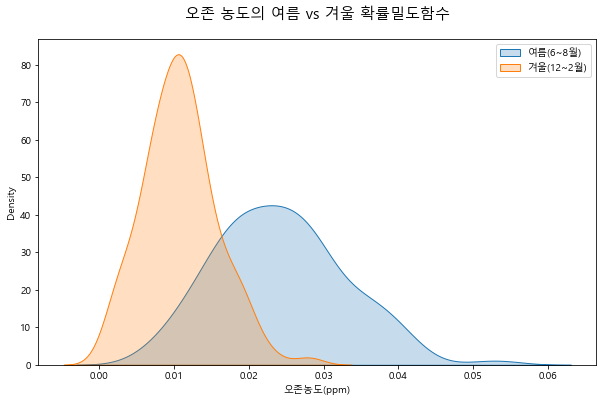

In [38]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=summer_O3_monthly, palette = col, shade=True, label='여름(6~8월)')
sns.kdeplot(data=winter_O3_monthly, palette = col, shade=True, label='겨울(12~2월)')
plt.legend()
plt.title('오존 농도의 여름 vs 겨울 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('오존 여름vs겨울 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [39]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(summer_O3_monthly, winter_O3_monthly, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 14.090134136581684, p-value : 1.131882536536111e-32


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
오존의 여름 평균이 겨울 평균에 비해 높다고 말할 수 있다. 즉, 이산화질소에 계절성이 존재한다.